In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ai_job_market.csv")


#Quick look 

In [12]:

print("First 5 rows:")
print(df.head(), "\n")


First 5 rows:
   job_id              company_name    industry                 job_title  \
0       1           Foster and Sons  Healthcare              Data Analyst   
1       2   Boyd, Myers and Ramirez        Tech  Computer Vision Engineer   
2       3                  King Inc        Tech          Quant Researcher   
3       4  Cooper, Archer and Lynch        Tech        AI Product Manager   
4       5                  Hall LLC     Finance            Data Scientist   

                                     skills_required experience_level  \
0  NumPy, Reinforcement Learning, PyTorch, Scikit...              Mid   
1                    Scikit-learn, CUDA, SQL, Pandas           Senior   
2          MLflow, FastAPI, Azure, PyTorch, SQL, GCP            Entry   
3       Scikit-learn, C++, Pandas, LangChain, AWS, R              Mid   
4                    Excel, Keras, SQL, Hugging Face           Senior   

  employment_type               location salary_range_usd posted_date  \
0       Ful

# Q1. Total job postings


In [17]:
total_jobs = len(df)
print("Ans: Total job postings:", total_jobs, "\n")


Ans: Total job postings: 2000 



# Q2. Number of unique companies


In [15]:
unique_companies = df["company_name"].nunique()
print("Ans: Unique companies hiring:", unique_companies, "\n")


Ans: Unique companies hiring: 1909 



# Q3. List all unique industries


In [19]:
unique_industries = df["industry"].unique()
print("Ans: Unique industries:")
print(unique_industries, "\n")



Ans: Unique industries:
['Healthcare' 'Tech' 'Finance' 'E-commerce' 'Automotive' 'Education'
 'Retail'] 



# Q4. Filter Senior-level jobs


In [20]:
senior_jobs = df[df["experience_level"] == "Senior"]
print("Ans: Senior-level jobs (first 5):")
print(senior_jobs.head(), "\n")



Ans: Senior-level jobs (first 5):
    job_id             company_name    industry                 job_title  \
1        2  Boyd, Myers and Ramirez        Tech  Computer Vision Engineer   
4        5                 Hall LLC     Finance            Data Scientist   
5        6                Ellis PLC  E-commerce        AI Product Manager   
9       10                Parks LLC  Automotive  Computer Vision Engineer   
13      14             Frank-Duarte      Retail          Quant Researcher   

                                      skills_required experience_level  \
1                     Scikit-learn, CUDA, SQL, Pandas           Senior   
4                     Excel, Keras, SQL, Hugging Face           Senior   
5                    GCP, Excel, Scikit-learn, MLflow           Senior   
9           Excel, Reinforcement Learning, TensorFlow           Senior   
13  Excel, MLflow, NumPy, Hugging Face, LangChain,...           Senior   

   employment_type               location salary_range_usd

# Q5. Convert posted_date to datetime


In [21]:
df["posted_date"] = pd.to_datetime(df["posted_date"])
print("Ans: posted_date dtype after conversion:", df["posted_date"].dtype, "\n")


Ans: posted_date dtype after conversion: datetime64[ns] 



# Q6. Split salary_range_usd into min_salary & max_salary


In [31]:
salary_split = df["salary_range_usd"].str.split("-", expand=True)
df["min_salary"] = pd.to_numeric(salary_split[0], errors="coerce")
df["max_salary"] = pd.to_numeric(salary_split[1], errors="coerce")

print("Ans: Added min_salary and max_salary (first 5):")
print(df[["salary_range_usd", "min_salary", "max_salary"]].head(), "\n")


Ans: Added min_salary and max_salary (first 5):
  salary_range_usd  min_salary  max_salary
0     92860-109598       92860      109598
1     78523-144875       78523      144875
2    124496-217204      124496      217204
3     50908-123743       50908      123743
4     98694-135413       98694      135413 



# Q7. Average max salary by industry


In [30]:
avg_max_salary_by_industry = df.groupby("industry")["max_salary"].mean().sort_values(ascending=False)
print("Ans: Average max salary by industry:")
print(avg_max_salary_by_industry, "\n")


Ans: Average max salary by industry:
industry
Tech          152193.594891
E-commerce    151989.487973
Finance       151847.268817
Automotive    151637.063333
Retail        149908.232082
Education     149075.017007
Healthcare    148227.293680
Name: max_salary, dtype: float64 



# Q8. Most common required skill


In [29]:
skills_series = (
    df["skills_required"]
    .str.split(",")
    .explode()
    .str.strip()
    .dropna()
)

skill_counts = skills_series.value_counts()
most_common_skill = skill_counts.idxmax()
print("Ans: Most common skill:", most_common_skill)
print("Skill frequency table (top 10):")
print(skill_counts.head(10), "\n")


Ans: Most common skill: TensorFlow
Skill frequency table (top 10):
skills_required
TensorFlow                452
Excel                     432
Pandas                    427
FastAPI                   419
NumPy                     416
Reinforcement Learning    414
Azure                     413
SQL                       408
Hugging Face              408
Keras                     406
Name: count, dtype: int64 



# Q9. Jobs posted in 2025 only


In [33]:
jobs_2025 = df[df["posted_date"].dt.year == 2025]
print("Ans: Jobs posted in 2025 (count):", len(jobs_2025))
print(jobs_2025.head(), "\n")


Ans: Jobs posted in 2025 (count): 723
   job_id     company_name    industry           job_title  \
0       1  Foster and Sons  Healthcare        Data Analyst   
2       3         King Inc        Tech    Quant Researcher   
4       5         Hall LLC     Finance      Data Scientist   
5       6        Ellis PLC  E-commerce  AI Product Manager   
8       9      Aguilar PLC  Healthcare         ML Engineer   

                                     skills_required experience_level  \
0  NumPy, Reinforcement Learning, PyTorch, Scikit...              Mid   
2          MLflow, FastAPI, Azure, PyTorch, SQL, GCP            Entry   
4                    Excel, Keras, SQL, Hugging Face           Senior   
5                   GCP, Excel, Scikit-learn, MLflow           Senior   
8                      Pandas, LangChain, GCP, Azure            Entry   

  employment_type               location salary_range_usd posted_date  \
0       Full-time          Tracybury, AR     92860-109598  2025-08-20   
2   

# Q10. Count jobs by experience_level


In [55]:
exp_level_counts = df["experience_level"].value_counts()
print("Ans: Jobs by experience level:")
print(exp_level_counts, "\n")


Ans: Jobs by experience level:
experience_level
Entry     702
Mid       668
Senior    630
Name: count, dtype: int64 



# Q11. Create a bar chart for job count per industry.

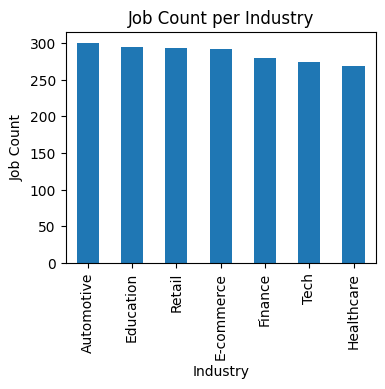

In [40]:

df["industry"].value_counts().plot(kind="bar", figsize=(4,3))
plt.title("Job Count per Industry")
plt.xlabel("Industry")
plt.ylabel("Job Count")
plt.show()


# Q12. Create a pie chart for experience levels.

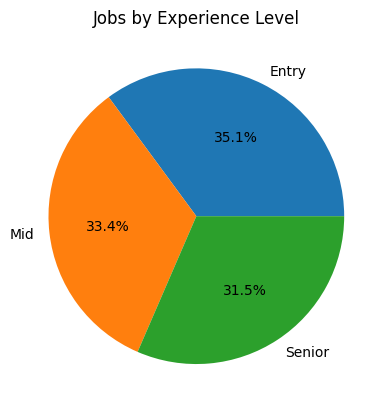

In [42]:
df["experience_level"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Jobs by Experience Level")
plt.ylabel("")
plt.show()


# Q13. Boxplot of max_salary grouped by industry.

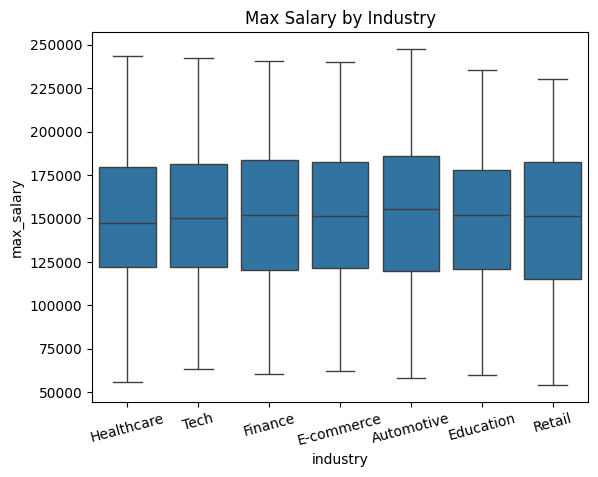

In [54]:
sns.boxplot(data=df, x="industry", y="max_salary")
plt.xticks(rotation=15)
plt.title("Max Salary by Industry")
plt.show()


# Q14. Create a boolean mask that returns salaries above 100,000.

In [61]:
mask = df["max_salary"].to_numpy() > 100000
df["max_salary"][mask]


0       109598
1       144875
2       217204
3       123743
4       135413
         ...  
1993    234157
1994    152463
1995    110126
1996    137195
1997    180108
Name: max_salary, Length: 1738, dtype: int64

# Q15. Use NumPy to calculate element-wise average of min_salary & max_salary.

In [62]:
avg_salary = (df["min_salary"].to_numpy() + df["max_salary"].to_numpy()) / 2
avg_salary


array([101229. , 111699. , 170850. , ..., 157551. ,  72463.5,  76604.5],
      shape=(2000,))